<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Applied_Statistics/MonteCarlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1. Monte Carlo Simulation**
---

**Monte Carlo simulation** is a computational technique that uses random sampling to model and analyze complex systems or processes. It is particularly useful for problems with a large number of variables or uncertainties, where deterministic methods are impractical. The core idea is to run a simulation multiple times with different random inputs and then aggregate the results to obtain a statistical estimate of the desired quantity

<img src="https://cdn.prod.website-files.com/6098e41066be8b2b7cb437cd/60f02f320d401a0c0d63abfe_20200228_LAD_Blog_Image_Plan-for-Growth-with-Monte-Carlo-Simulations-01.png" width="700" height="300">

Image taken from: [Ladder-Blog](https://ladder.io/blog/monte-carlo-simulation)

**1. Context**: Let's consider the following situation; It's 9:00 AM in the morning when your boss, Todd, comes into the office demanding that you havetwo reports on his desk by end of day. These demands are particularly frustrating to you as you scheduled months ago a met up with your friends and family that's taking place at 6:00 PM.

**Key Question**:
- What is the probability that you could even finish these two reports in time for the party?
- How could you actually even go about computing that probability?

In [ ]:
# Libraries:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
simulation = 1000000

A = np.random.uniform(1, 5, simulation)
B = np.random.uniform(2, 6, simulation)

duration = A + B

In [ ]:
# Let's take a look at the duration (A + B) distribution.
duration

array([9.37322313, 5.84601592, 8.51101985, ..., 8.83501488, 9.61581086,
       8.38570536])

##**2. Interpret the Results**
---

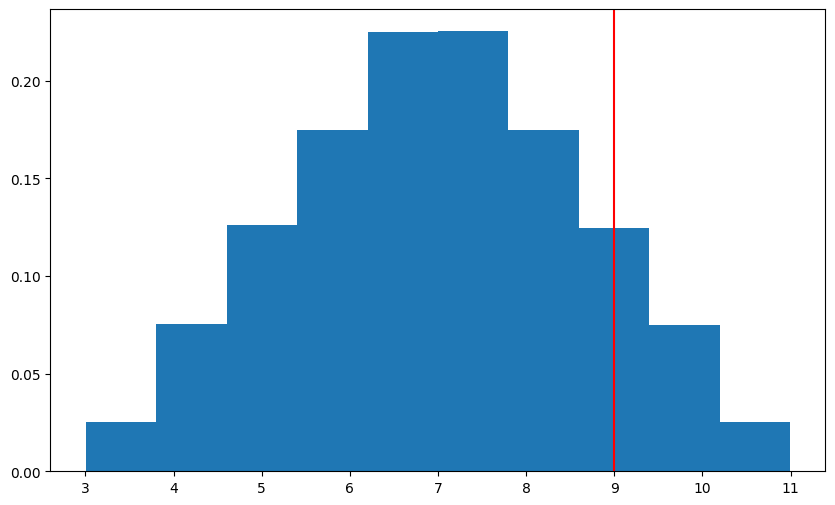

Probability of finishing both tasks in more than 9 hrs: 0.124668
Probability of finishing both tasks in less than 9 hrs: 0.875332


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
plt.hist(duration, density = True)
# Time limit to complete the task
plt.axvline(9, color = 'r')
plt.show()
#print(f"Probability of finishing both tasks in more than 9 hrs: {prob_9hrs}")
#print(f"Probability of finishing both tasks in less than 9 hrs: {1 - prob_9hrs}")

**2. Coin Flip Example**:

The probability of head for a fair coin is 1/2. However, is there any way we can prove it experimentally? In this example, we are going to use the Monte-Carlo method to simulate the coin-flipping iteratively 5000 times to find out why the probability of a head or tail is always 1/2. If we repeat this coin flipping many, many more times, then we can achieve higher accuracy on an exact answer for our probability value.

While flipping a coin:

$$P(head) = P(Tail) = 1/2$$

Next, we are going to prove this formula experimetally using the Monte Carlo Method.

In [ ]:
# Coin flip function:
# 0 ---> Heads
# 1 ---> Tails

def coin_flip():
  return random.randint(0, 1)

In [ ]:
# Checking the output of the function:
coin_flip()

0

##**Monte Carlo Simulation**

In [ ]:
# Main function
# Monte Carlo Simulation:

# Empty list to store the probability values

probability = []

def monte_carlo(n):
  results = 0
  for i in range(n):
    flip_result = coin_flip()
    results = results + flip_result

    # Calculating probability value:
    prob_value = results/(i + 1)

    # Append the probability values to the list:
    probability.append(prob_value)

    # Plot the results:

    plt.axhline(y = 0.5, color = 'r', linestyle = '-')
    plt.xlabel("Iterations")
    plt.ylabel("Probability")
    plt.plot(probability)

  return results/n

<Figure size 1000x600 with 0 Axes>

Final Probability after the simulation: 0.505


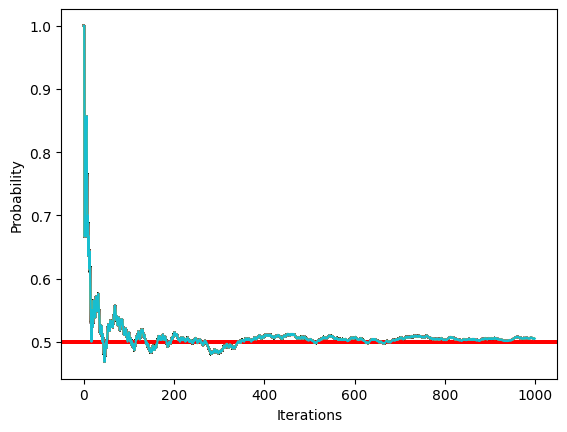

In [ ]:
# Calling the function:
Prob = monte_carlo(1000)
print(f"Final Probability after the simulation: {Prob}")

As shown in the plot, we show that after 1000 iterations, the probability of getting a tail is **0.505**.

**2. Monty Hall Problem**:

Suppose you are on a game show, and you have the choice of picking one of three doors: Behind one door is a car; behind the other doors, goats. You pick a door, let's say door 1, and the host who knows what's behind the doors, opens another door, say door 3, which has a goat. The host then asks you: do you want to stick with your choice or choose another door?

- Is it to your advantage to switch your choice of door?

**Based on probability, it turns out it is to our advantage to switch the doors. Let's find out how:**

Initially, for all three gates, the probability (P) of getting the car is the same ($P=1/3$).

![Monty Hall Game](https://miro.medium.com/v2/resize:fit:720/format:webp/0*ovOex55tldMX3WEI.png)



Now assume that the contestant chooses door 1. Next, the host opens the third door, which has a goat. Next, the host asks the contestant if he/she wants to switch the doors?

We will see why it is more advantageous to switch the door:

![Monty Hall Problem](https://miro.medium.com/v2/resize:fit:720/format:webp/0*bHbVj17ckJHzoUai.png)

In the previous figure, we can see that after the host opens door 3, the probability of the last two doors of having a car increases to 2/3. Hence, it is more advantegeous to switch the doors.


Now we are going to use **Monte Carlo Method** to perform this test case many times and find out its probabilities in an experimental way.  



In [ ]:
# Initialize some data:
# 1 - Car
# 2 - Goats

doors = ["goat", "goat", "car"]

# Empty lists to store probability values:
switch_win_prob = []
stick_win_prob = []


In [ ]:
# Main Function
# Monte Carlo Simulation:

def monte_carlo_monty(n):

  #Calculating switch and stick wins:
  switch_wins = 0
  stick_wins = 0

  for i in range(n):

    # Randomly placing the car and goats behind the three doors:
    random.shuffle(doors)

    # Contestant's choice:
    k = random.randrange(2)

    # If the contestant doesn't get the car:
    if doors[k] != 'car':
      switch_wins +=1

    # If the contestant get the car:
    else:
      stick_wins += 1

    # Updating the list values:
    switch_win_prob.append(switch_wins/(i + 1))
    stick_win_prob.append(stick_wins/(i + 1))

    # Plotting the data:
    plt.plot(switch_win_prob)
    plt.plot(stick_win_prob)
  print(f"Winning probability if you always switch: {switch_win_prob[-1]}")
  print(f"Winning probability if you stick to your original choice: {stick_win_prob[-1]}")


Winning probability if you always switch: 0.662
Winning probability if you stick to your original choice: 0.338


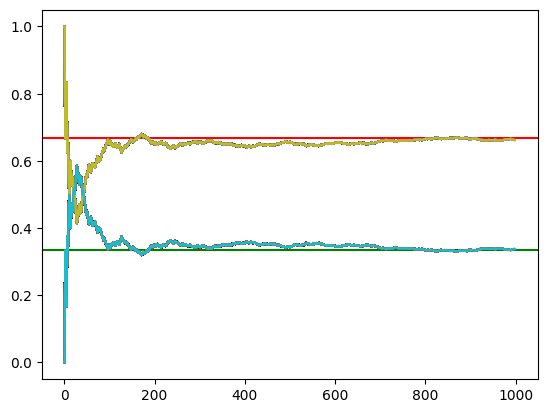

In [ ]:
# Calling the main function:
plt.axhline(y = 2/3, color = 'r', linestyle = '-')
plt.axhline(y = 1/3, color = 'g', linestyle = '-')
monte_carlo_monty(1000)

In the previous plot, we show that after 1000 (n) iterations , the winning probability if we switch the door is 0.669. Therefore, we are confident that it works to our advantage to switch the door in this example.